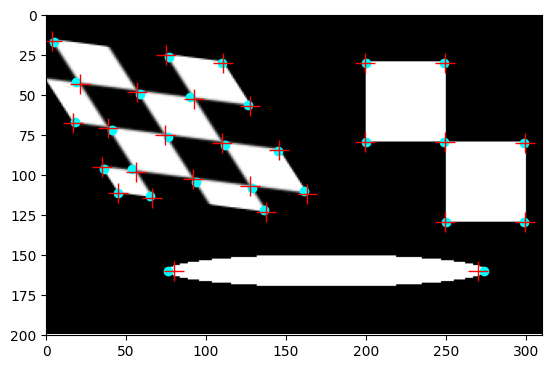

In [1]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

# Sheared checkerboard
tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(110, 30))
image = warp(data.checkerboard()[:90, :90], tform.inverse,
             output_shape=(200, 310))
# Ellipse
rr, cc = ellipse(160, 175, 10, 100)
image[rr, cc] = 1
# Two squares
image[30:80, 200:250] = 1
image[80:130, 250:300] = 1

coords = corner_peaks(corner_harris(image), min_distance=5, threshold_rel=0.02)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 310, 200, 0))
plt.show()

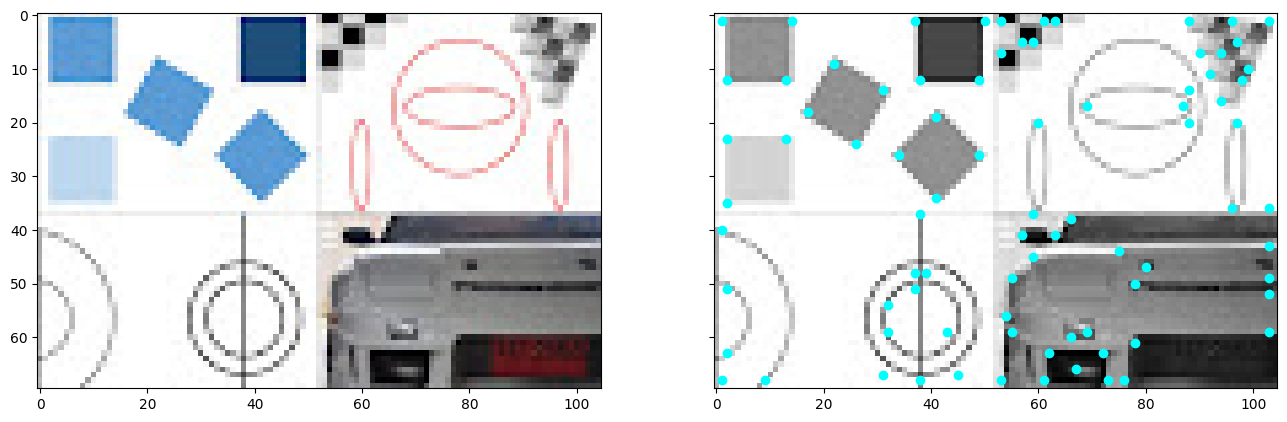

In [3]:
from skimage import io
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

from skimage.color import rgb2gray

filename = 'Example_Lab.jpg'
image_rgb = io.imread(filename)

image = rgb2gray(image_rgb)

# skimage.feature.corner_peaks(image, min_distance=1, 
#     threshold_abs=None, threshold_rel=None, 
#     exclude_border=True, indices=True, num_peaks=inf, 
#     footprint=None, labels=None, *, 
#     num_peaks_per_label=inf, p_norm=inf)
coords = corner_peaks(corner_harris(image), min_distance=1, threshold_rel=0.001)

# fig, ax = plt.subplots()
fig, ax = plt.subplots(1, 2, figsize=(16, 16), sharex=True, sharey=True)

# Originla Image
ax[0].imshow(image_rgb)

# Show the corner points
ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)

plt.show()

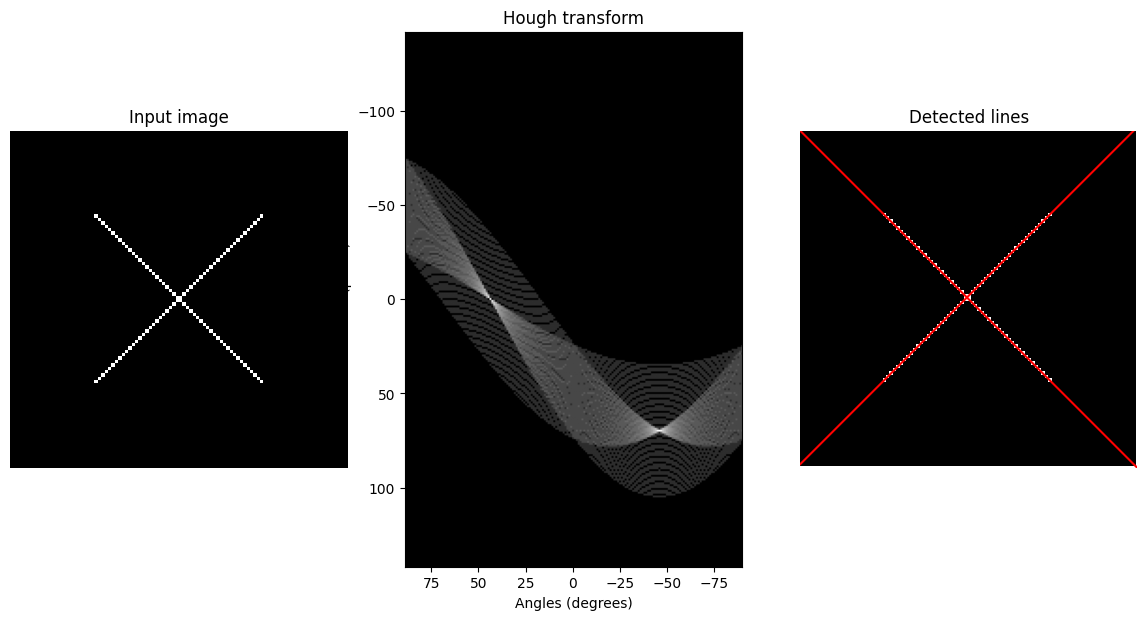

In [4]:
from matplotlib import cm
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import numpy as np
import matplotlib.pyplot as plt

# Constructing test image.
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform.
h, theta, d = hough_line(image)

# Generating figure 1.
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 6))
plt.tight_layout()

ax0.imshow(image, cmap=cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()

# Generating Hough Transform
ax1.imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
           d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
ax1.set_title('Hough transform')
ax1.set_xlabel('Angles (degrees)')
ax1.set_ylabel('Distance (pixels)')
ax1.axis('image')

# Show the result lines 
ax2.imshow(image, cmap=cm.gray)
row1, col1 = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    ax2.plot((0, col1), (y0, y1), '-r')
ax2.axis((0, col1, row1, 0))
ax2.set_title('Detected lines')
ax2.set_axis_off()

plt.show()

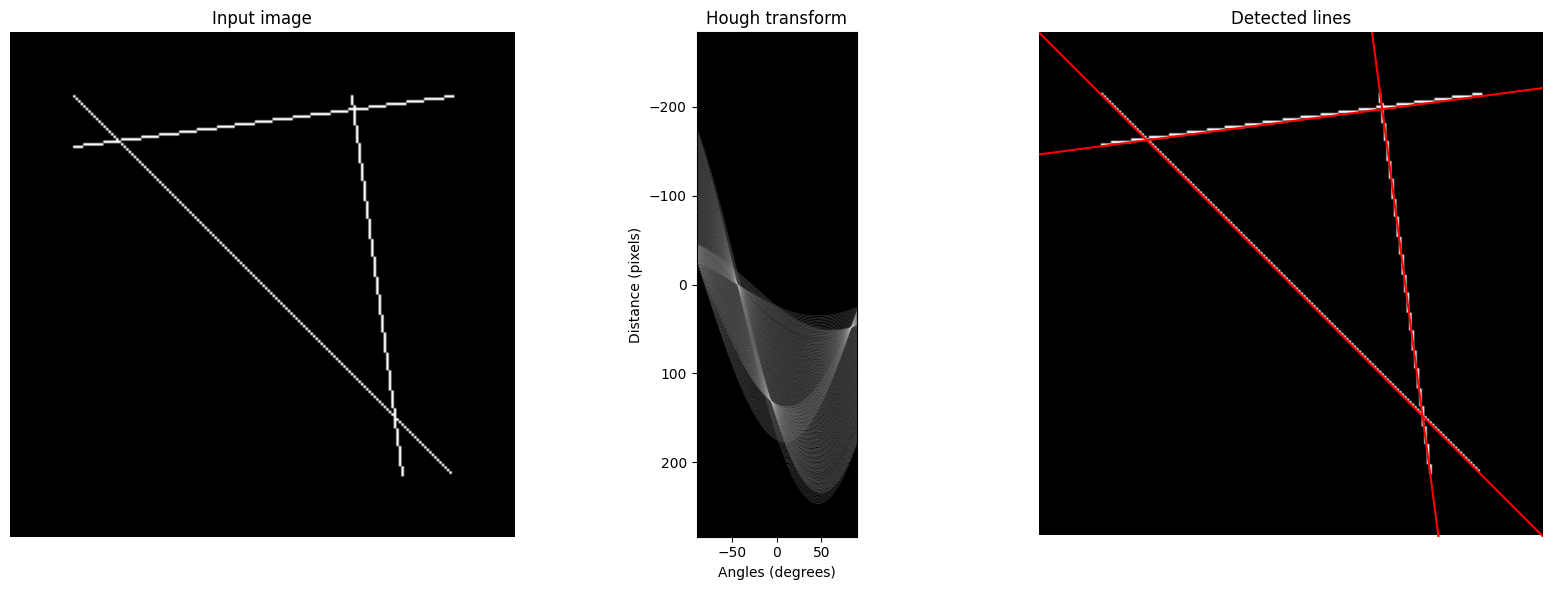

In [5]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

import matplotlib.lines as lines

# Constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[line(45, 25, 25, 175)] = 255
image[line(25, 135, 175, 155)] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
row1, col1 = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, col1), (y0, y1), '-r')
ax[2].axis((0, col1, row1, 0))
ax[2].set_title('Detected lines')
ax[2].set_axis_off()

plt.tight_layout()
plt.show()


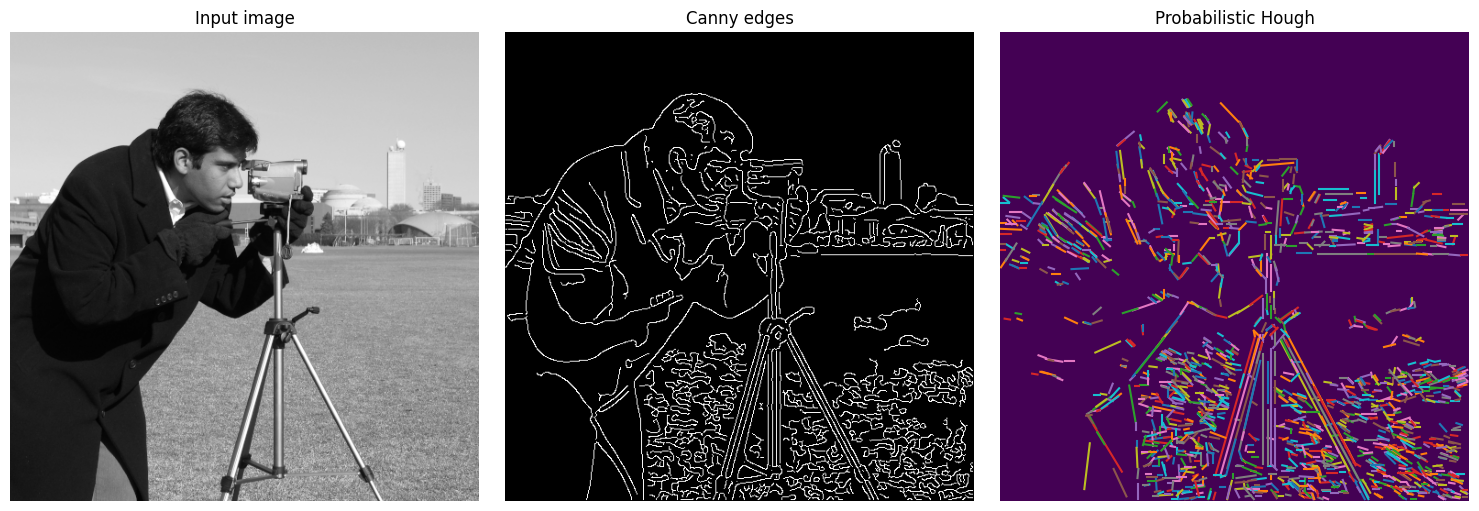

In [6]:
from skimage.transform import probabilistic_hough_line

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

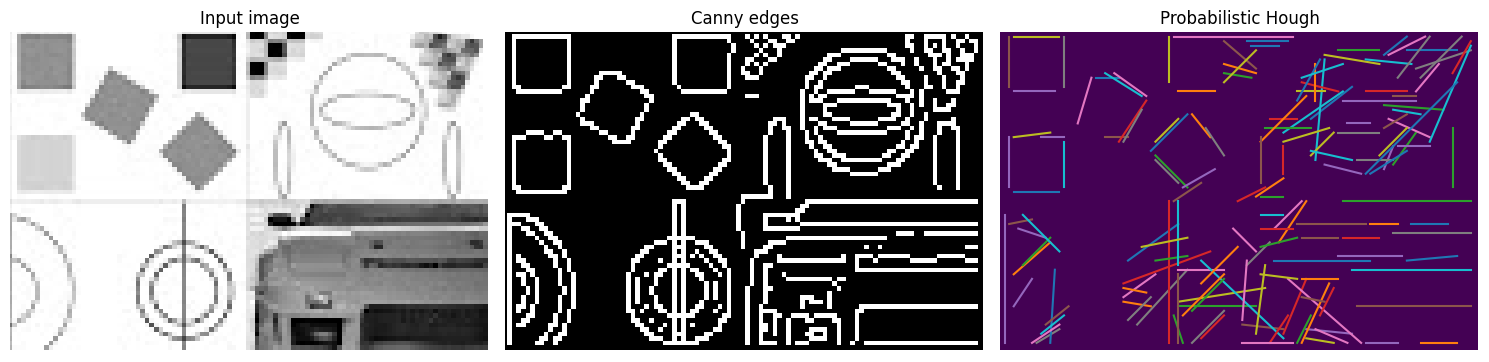

In [7]:
from skimage import io
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

from skimage.transform import probabilistic_hough_line

filename = 'Example_Lab.jpg'
image_rgb = io.imread(filename)
image = rgb2gray(image_rgb)

edges = canny(image)
# edges = canny(image, 2, 1) # Depend on a edge detection algorithm
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()